In [1]:
from pydub import AudioSegment
from IPython import display

In [32]:
sound = AudioSegment.from_file("data/downloaded/983564.wav")

sound_channels = sound.split_to_mono()
sound.channels


False

True

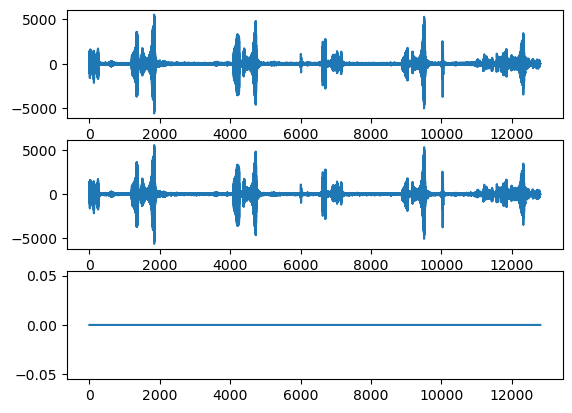

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from pydub import silence, effects

c1 = sound_channels[0]
c2 = sound_channels[0]
a1 = c1.get_array_of_samples()
a2 = c2.get_array_of_samples()
rate = c1.frame_rate
time = np.linspace(0, len(a1) / rate * 1000, num=len(a1))
diff = np.array(a1) - np.array(a2)

plt.subplot(311).plot(time, a1)
#plt.subplot(312).set_xlim(0, len(a1) / rate * 1000)
plt.subplot(312).plot(time, a2)
plt.subplot(313).plot(time, diff)
plt.plot()
diff
a1 == a2

In [14]:
from pydub import silence, effects

print(len(sound))
print(sound.max_dBFS)
sound2 = effects.normalize(sound)
print(sound2.max_dBFS)
print(silence.detect_silence(sound, silence_thresh=-40))
print(silence.detect_nonsilent(sound, silence_thresh=-33))

12814
-14.830345749841452
-0.09997527890305569
[[0, 1325], [1846, 4169], [4726, 9247], [9540, 11835]]
[]


0 137
1220 1858
4116 4740
6628 6928
8974 10049
11224 12814


[]

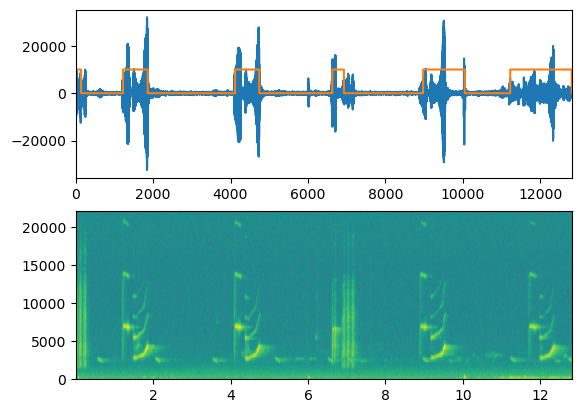

In [39]:
import matplotlib.pyplot as plt
import numpy as np
c1 = sound_channels[0]
c1 = effects.normalize(c1)
a1 = c1.get_array_of_samples()
rate = c1.frame_rate
time = np.linspace(0, len(a1) / rate * 1000, num=len(a1))

geluiden = silence.detect_nonsilent(c1, silence_thresh=-33, seek_step=1)
tijdgeluid = np.zeros(len(a1))
for [l,r] in geluiden:
    print(l,r)
    l = int(l * rate / 1000.0)
    r = int(r * rate / 1000.0)
    tijdgeluid[l:r] = 10000

plt.subplot(211).plot(time, a1, time, tijdgeluid)
plt.subplot(211).set_xlim(0, len(a1) / rate * 1000)
plt.subplot(212).specgram(a1, Fs=rate)
plt.plot()

In [41]:
from pydub import playback

from IPython.display import display

display(c1)

ds = silence.split_on_silence(c1, silence_thresh=-33, keep_silence=300)
for d in ds:
    display(d)


In [6]:
type(sound.raw_data)
sound.array_type

'h'